In [1]:
import pandas as pd
import numpy as np

In [2]:
pd_data = pd.read_csv("Reviews.csv")
indexbyid = pd.read_csv("Reviews.csv",index_col = "UserId")

In [3]:
pd_data = pd_data[:10000]
userid = pd_data['UserId'].value_counts().keys().tolist()[:10]
counts = pd_data['UserId'].value_counts().tolist()[:10]

In [4]:
score = []
for i in range(len(userid)):
    totalscore = pd_data['Score'].where(pd_data['UserId'] == userid[i])
    tmp = 0
    for j in totalscore:
        if not np.isnan(j):
            tmp = tmp + j  
    score.append(tmp/counts[i])

In [5]:
profilename = []
for i in userid:
    name = indexbyid.loc[i,"ProfileName"].tolist()
    profilename.append(name[0])

The output has more than 3 6-count reviewers, so the result may be different from the [example](https://camo.githubusercontent.com/e735dead572a4a2197f76dbbd71c875756949314/68747470733a2f2f692e696d6775722e636f6d2f79316535566a332e706e67)

In [6]:
dict = {"UserID":userid,"Profilename":profilename,"Score count":counts,"Score mean":score}
output_df = pd.DataFrame(dict)
output_df.set_index(["UserID", "Profilename"], inplace = True) 
print(output_df)

                                                           Score count  \
UserID         Profilename                                               
A1Z54EM24Y40LL c2                                                   17   
A2SZLNSI5KOQJT Carrie, "Formerly &#34;Sister Carrie&#34;"           10   
A35R32TA60XD57 M. Torma                                              9   
A281NPSIMI1C2R Rebecca of Amazon "The Rebecca Review"                8   
A3NHUQ33CFH3VM Citizen John                                          7   
A3OXHLG6DIBRW8 C. F. Hill "CFH"                                      7   
A3PJZ8TU8FDQ1K Jared Castle                                          7   
A3TX6CWSZL02PW LaVerne ":LaVerne"                                    6   
A10H24TDLK2VDP William Jens Jensen                                   6   
AQQLWCMRNDFGI  Steven A. Peterson                                    6   

                                                           Score mean  
UserID         Profilename             

In [7]:
import matplotlib.pyplot as plt
Scoreofc2 = []

for j in pd_data['Score'].where(pd_data['UserId'] == userid[0]):
    if not np.isnan(j):
        Scoreofc2.append(j)
        
frequecyofscore = [0,0,0,0,0]
scorelist = [1,2,3,4,5]
for num in Scoreofc2:
    frequecyofscore[int(num)-1] = frequecyofscore[int(num)-1] + 1
plt.bar(scorelist,frequecyofscore,color=['cornflowerblue','orange','g','r','darkorchid'])


<BarContainer object of 5 artists>

<BarContainer object of 10 artists>

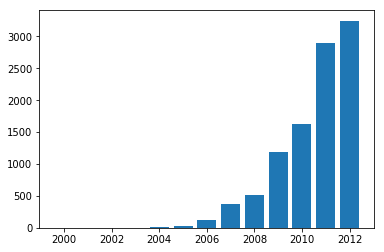

In [8]:
import datetime
from collections import Counter
years = []
for i in range(10000):
    acctime = pd_data.loc[i,'Time']
    year = datetime.datetime.fromtimestamp(acctime).isoformat()
    years.append(int(year[0:4]))
yearcollec = Counter(years)

year_X_axis = list(yearcollec.keys())
year_Y_axis = list(yearcollec.values())

plt.bar(year_X_axis,year_Y_axis)

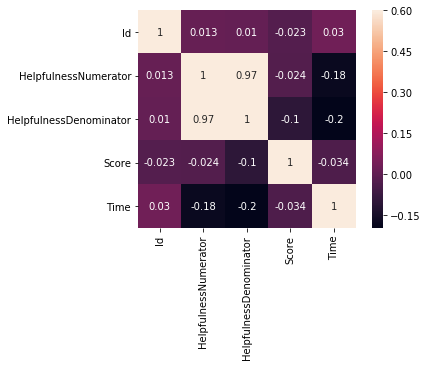

In [9]:
import seaborn as sns

foo = sns.heatmap(pd_data.drop(['ProductId','UserId', 'ProfileName', 'Summary', 'Text'], axis = 1).corr(), 
                  vmax = 0.6, square = True, annot=True)